# Microsoft Malware detection


# 1.Business/Real-world Problem





# 1.1. Problem Statement
In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to identify whether a given piece of file/software is a malware.

# 1.2 Source/Useful Links

Microsoft has been very active in building anti-malware products over the years and it runs it’s anti-malware utilities over 150 million computers around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 

This dataset provided by Microsoft contains about 9 classes of malware. ,

Source: https://www.kaggle.com/c/malware-classification

# 1.3. Real-world/Business objectives and constraints.

Minimize multi-class error.
Multi-class probability estimates.
Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.


# 2. Machine Learning Problem

# 2.1. Data

2.1.1. Data Overview
Source : https://www.kaggle.com/c/malware-classification/data
For every malware, we have two files
.asm file (read more: https://www.reviversoft.com/file-extensions/asm)
.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)
Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:
Lots of Data for a single-box/computer.
There are total 10,868 .bytes files and 10,868 asm files total 21,736 files
There are 9 types of malwares (9 classes) in our give data

Types of Malware:
Ramnit
Lollipop
Kelihos_ver3
Vundo
Simda
Tracur
Kelihos_ver1
Obfuscator.ACY
Gatak



# 2.1.2. Example Data Point
.asm file

.text:00401000                                       assume es:nothing, ss:nothing, ds:_data,    fs:nothing, gs:nothing
.text:00401000 56                                   push    esi
.text:00401001 8D 44 24    08                               lea     eax, [esp+8]
.text:00401005 50                                   push    eax
.text:00401006 8B F1                                   mov     esi, ecx
.text:00401008 E8 1C 1B    00 00                               call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08    BB 42 00                           mov     dword ptr [esi],    offset off_42BB08
.text:00401013 8B C6                                   mov     eax, esi
.text:00401015 5E                                   pop     esi
.text:00401016 C2 04 00                                   retn    4
.text:00401016                               ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC    CC CC CC CC                           align 10h
.text:00401020 C7 01 08    BB 42 00                           mov     dword ptr [ecx],    offset off_42BB08
.text:00401026 E9 26 1C    00 00                               jmp     sub_402C51
.text:00401026                               ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC    CC CC                               align 10h
.text:00401030 56                                   push    esi
.text:00401031 8B F1                                   mov     esi, ecx
.text:00401033 C7 06 08    BB 42 00                           mov     dword ptr [esi],    offset off_42BB08
.text:00401039 E8 13 1C    00 00                               call    sub_402C51
.text:0040103E F6 44 24    08 01                               test    byte ptr    [esp+8], 1
.text:00401043 74 09                                   jz      short loc_40104E
.text:00401045 56                                   push    esi
.text:00401046 E8 6C 1E    00 00                               call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04                                   add     esp, 4
.text:0040104E
.text:0040104E                               loc_40104E:                   ; CODE XREF: .text:00401043j
.text:0040104E 8B C6                                   mov     eax, esi
.text:00401050 5E                                   pop     esi
.text:00401051 C2 04 00                                   retn    4
.text:00401051              
; ---------------------------------------------------------------------------




.bytes file

00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00


# 2.2. Mapping the real-world problem to an ML problem
2.2.1. Type of Machine Learning Problem
There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem


# 2.2.2. Performance Metric
Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s):

Multi class log-loss
Confusion matrix



# 2.2.3. Machine Learing Objectives and Constraints
Objective: Predict the probability of each data-point belonging to each of the nine classes.

Constraints:

Class probabilities are needed.
Penalize the errors in class probabilites => Metric is Log-loss.
Some Latency constraints.

# 2.3. Train and Test Dataset
Split the dataset randomly into two parts train and test with 60% and 20% of data respectively


In [1]:
setwd("E:/Microsoft Malware Detection/Train")

# All files (.byte and .asm)

In [2]:
list.files()

[1] "01azqd4InC7m9JpocGv5.asm"   "01azqd4InC7m9JpocGv5.bytes"
    [3] "01IsoiSMh5gxyDYTl4CB.asm"   "01IsoiSMh5gxyDYTl4CB.bytes"
    [5] "01jsnpXSAlgw6aPeDxrU.asm"   "01jsnpXSAlgw6aPeDxrU.bytes"
    [7] "01kcPWA9K2BOxQeS5Rju.asm"   "01kcPWA9K2BOxQeS5Rju.bytes"
    [9] "01SuzwMJEIXsK7A8dQbl.asm"   "01SuzwMJEIXsK7A8dQbl.bytes"
   [11] "02IOCvYEy8mjiuAQHax3.asm"   "02IOCvYEy8mjiuAQHax3.bytes"
   [13] "02JqQ7H3yEoD8viYWlmS.asm"   "02JqQ7H3yEoD8viYWlmS.bytes"
   [15] "02K5GMYITj7bBoAisEmD.asm"   "02K5GMYITj7bBoAisEmD.bytes"
   [17] "02mlBLHZTDFXGa7Nt6cr.asm"   "02mlBLHZTDFXGa7Nt6cr.bytes"
   [19] "02MRILoE6rNhmt7FUi45.asm"   "02MRILoE6rNhmt7FUi45.bytes"
   [21] "02zcUmKV16Lya5xqnPGB.asm"   "02zcUmKV16Lya5xqnPGB.bytes"
   [23] "03nJaQV6K2ObICUmyWoR.asm"   "03nJaQV6K2ObICUmyWoR.bytes"
   [25] "04BfoQRA6XEshiNuI7pF.asm"   "04BfoQRA6XEshiNuI7pF.bytes"
   [27] "04cvLCVPqBMs6yn5xGlE.asm"   "04cvLCVPqBMs6yn5xGlE.bytes"
   [29] "04EjIdbPV5e1XroFOpiN.asm"   "04EjIdbPV5e1XroFOpiN.bytes"
   [31] "04hSzLv5s2TDYPlcgpHB.asm"   "04hSzLv5s2TDYPlcgpHB.bytes"
   [33] "04mcPSei852tgIKUwTJr.asm"   "04mcPSei852tgIKUwTJr.bytes"
   [35] "04QzZ3DVdPsEp9elLR65.asm"   "04QzZ3DVdPsEp9elLR65.bytes"
   [37] "04sJnMaORYc1SV5pKjrP.asm"   "04sJnMaORYc1SV5pKjrP.bytes"
   [39] "05aiMRw13bYWqZ8OHvjl.asm"   "05aiMRw13bYWqZ8OHvjl.bytes"
   [41] "05EeG39MTRrI6VY21DPd.asm"   "05EeG39MTRrI6VY21DPd.bytes"
   [43] "05IXcWGxvnkto4sq17zZ.asm"   "05IXcWGxvnkto4sq17zZ.bytes"
   [45] "05Kps4iFw8mOLJZQrb1H.asm"   "05Kps4iFw8mOLJZQrb1H.bytes"
   [47] "05LHG8fR3iPn6agIo9z7.asm"   "05LHG8fR3iPn6agIo9z7.bytes"
   [49] "05rJTUWYAKNegBk2wE8X.asm"   "05rJTUWYAKNegBk2wE8X.bytes"
   [51] "065EZhxgbLRSHsB87uIF.asm"   "065EZhxgbLRSHsB87uIF.bytes"
   [53] "06aLOj8EUXMByS423sum.asm"   "06aLOj8EUXMByS423sum.bytes"
   [55] "06arUi9q3wHS2C8RZxeB.asm"   "06arUi9q3wHS2C8RZxeB.bytes"
   [57] "06KfrF7ltESna2ZHPVp5.asm"   "06KfrF7ltESna2ZHPVp5.bytes"
   [59] "06osXqPUVM1HbvBGNncT.asm"   "06osXqPUVM1HbvBGNncT.bytes"
   [61] "06QinlpeFIWj8qHc7Vys.asm"   "06QinlpeFIWj8qHc7Vys.bytes"
   [63] "07ECKjDTyQLnabNoxrIH.asm"   "07ECKjDTyQLnabNoxrIH.bytes"
   [65] "07iSOIG2urUvsMl9E5Rn.asm"   "07iSOIG2urUvsMl9E5Rn.bytes"
   [67] "07nrG1cLKUPxjOlWMFiV.asm"   "07nrG1cLKUPxjOlWMFiV.bytes"
   [69] "08BX5Slp2I1FraZWbc6j.asm"   "08BX5Slp2I1FraZWbc6j.bytes"
   [71] "09bfacpUzuBN5W3S8KTo.asm"   "09bfacpUzuBN5W3S8KTo.bytes"
   [73] "09CPNMYyQjSguFrE8UOf.asm"   "09CPNMYyQjSguFrE8UOf.bytes"
   [75] "09LXtWxm1EbK5uVqcQS3.asm"   "09LXtWxm1EbK5uVqcQS3.bytes"
   [77] "09sXMJUHwQWVanrhzAoT.asm"   "09sXMJUHwQWVanrhzAoT.bytes"
   [79] "0A32eTdBKayjCWhZqDOQ.asm"   "0A32eTdBKayjCWhZqDOQ.bytes"
   [81] "0ACDbR5M3ZhBJajygTuf.asm"   "0ACDbR5M3ZhBJajygTuf.bytes"
   [83] "0AguvpOCcaf2myVDYFGb.asm"   "0AguvpOCcaf2myVDYFGb.bytes"
   [85] "0akIgwhWHYm1dzsNqBFx.asm"   "0akIgwhWHYm1dzsNqBFx.bytes"
   [87] "0aKlH1MRxLmv34QGhEJP.asm"   "0aKlH1MRxLmv34QGhEJP.bytes"
   [89] "0AnoOZDNbPXIr2MRBSCJ.asm"   "0AnoOZDNbPXIr2MRBSCJ.bytes"
   [91] "0ASH2csN7k8jZyoRaqtn.asm"   "0ASH2csN7k8jZyoRaqtn.bytes"
   [93] "0aSTGBVRXeJhx5OcpsgC.asm"   "0aSTGBVRXeJhx5OcpsgC.bytes"
   [95] "0aU7XWsr8RtN94jvo3lG.asm"   "0aU7XWsr8RtN94jvo3lG.bytes"
   [97] "0AV6MPlrTWG4fYI7NBtQ.asm"   "0AV6MPlrTWG4fYI7NBtQ.bytes"
   [99] "0aVNj3qFgEZI6Akf4Kuv.asm"   "0aVNj3qFgEZI6Akf4Kuv.bytes"
  [101] "0aVxkvmflEizUBG2rMT4.asm"   "0aVxkvmflEizUBG2rMT4.bytes"
  [103] "0AwWs42SUQ19mI7eDcTC.asm"   "0AwWs42SUQ19mI7eDcTC.bytes"
  [105] "0B2RwKm6dq9fjUWDNIOa.asm"   "0B2RwKm6dq9fjUWDNIOa.bytes"
  [107] "0b5LqcWix3J4fGIEhXQu.asm"   "0b5LqcWix3J4fGIEhXQu.bytes"
  [109] "0BEsCP7NAUy8XmkenHWG.asm"   "0BEsCP7NAUy8XmkenHWG.bytes"
  [111] "0BFIPv1rO83whtpMYyAs.asm"   "0BFIPv1rO83whtpMYyAs.bytes"
  [113] "0BIdbVDEgmPwjYF4xzir.asm"   "0BIdbVDEgmPwjYF4xzir.bytes"
  [115] "0bjN3Kgw5OATSreRmEdi.asm"   "0bjN3Kgw5OATSreRmEdi.bytes"
  [117] "0BKcmNv4iGY2hsVSaXJ6.asm"   "0BKcmNv4iGY2hsVSaXJ6.bytes"
  [119] "0BLbmzJRkjNynCgQIdtV.asm"   "0BLbmzJRkjNynCgQIdtV.bytes"
  [121] "0bN6ODYWw2xeCQBn3tEg.asm"   "0bN6OD

Taking sample of 1k files

In [ ]:
sample_df<-sample(list.files(),1000)
dir.create('asmFiles')
dir.create('byteFiles')
sample_asm<-sample_df[endsWith(sample_df,".asm")]
sample_byte<-sample_df[endsWith(sample_df,".bytes")]

asmFiles_dir<-gsub(" /","/asmFiles",paste(getwd(),"/"))
byteFiles_dir<-gsub(" /","/byteFiles",paste(getwd(),"/"))

file.copy(sample_asm,asmFiles_dir)
file.copy(sample_byte,byteFiles_dir)

In [3]:

train_labels<-read.csv("E:/Microsoft Malware Detection/train_/trainLabels.csv")
table(train_labels$Class)



   1    2    3    4    5    6    7    8    9 
1541 2478 2942  475   42  751  398 1228 1013 

# Exploratory Data Analysis

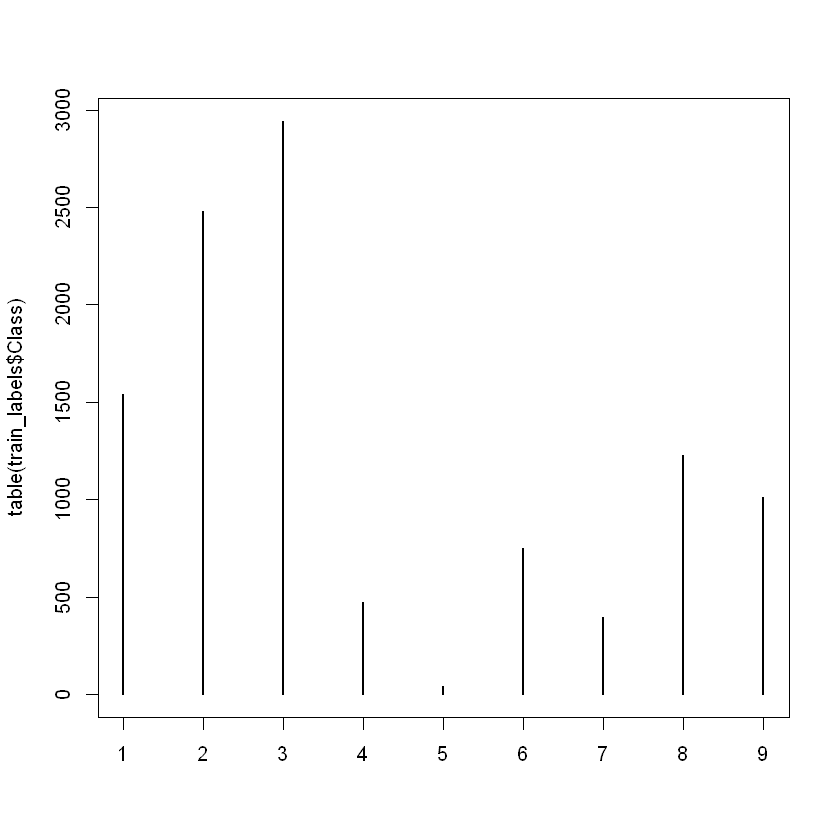

In [4]:


plot(table(train_labels$Class))

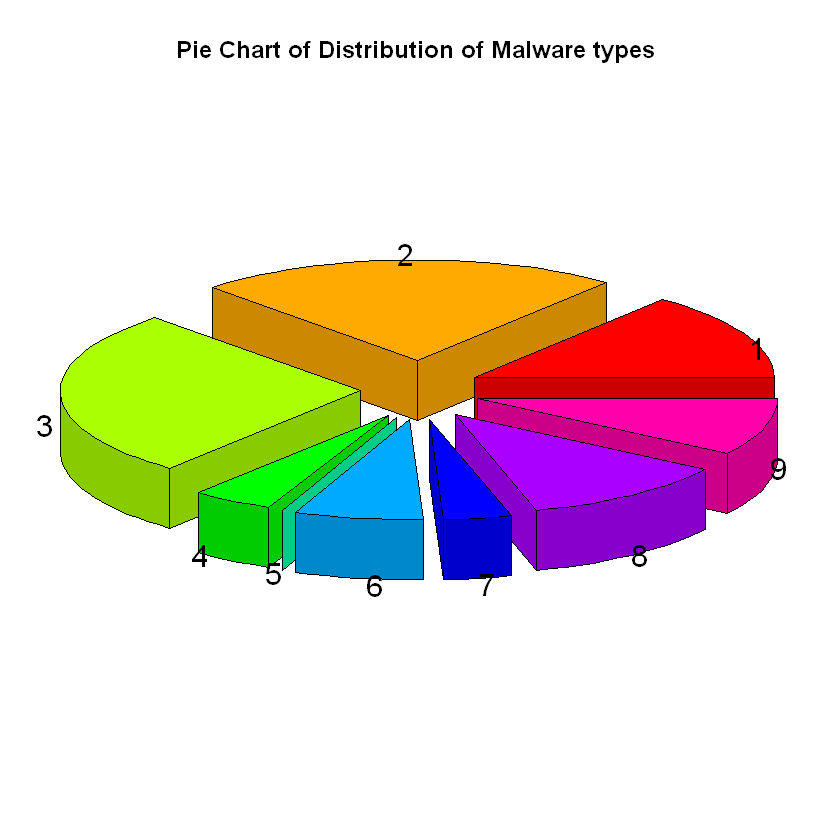

In [6]:

  # Create data for the graph.
  x <-  as.numeric(paste(round(prop.table(table(train_labels$Class))*100,2)))
  lbl <-  unique(train_labels$Class)
  
  # Give the chart file a name.

  library(plotrix)
  # Plot the chart.
  pie3D(x,labels = lbl,explode = 0.2, main = "Pie Chart of Distribution of Malware types ")
  



# Distribution of malware classes in whole data set

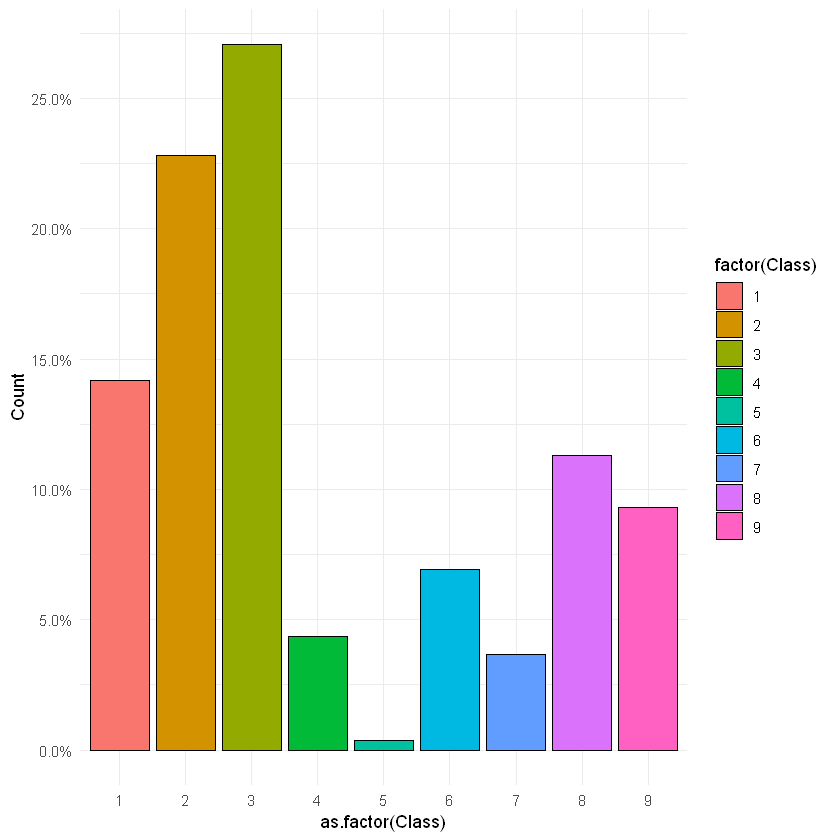

In [11]:

  library(ggplot2)
  # Use the mtcars dataset.
 brks<-seq(0,1,0.05)  
  
  # Basic barplot:
ggplot(train_labels, aes(x=as.factor(Class),fill = factor(Class) )) +  geom_bar(aes(y = (..count..)/sum(..count..)),width = 0.9,colour="black")+
    scale_y_continuous(breaks = brks,labels=scales::percent) +
    ylab("Count")+ theme_minimal()
  
  

In [12]:

  setwd(byteFiles_dir)
  #setwd("E:/Microsoft Malware Detection/train_/byteFiles")
  byte_files<-list.files()
  byte_files_unlist<-unlist(strsplit(byte_files,".bytes"))
  byte_df<- data.frame()
  
  

box plots of file size (.byte files) feature

                       Id Class     Size
1542 01IsoiSMh5gxyDYTl4CB     2 6.556152
9857 01jsnpXSAlgw6aPeDxrU     9 4.602051
7483 08BX5Slp2I1FraZWbc6j     6 1.047852
9861 0B2RwKm6dq9fjUWDNIOa     9 4.616211
9862 0bjN3Kgw5OATSreRmEdi     9 4.616211
8235 0hZEqJ5eMVjU21HAG7Ii     7 5.055176


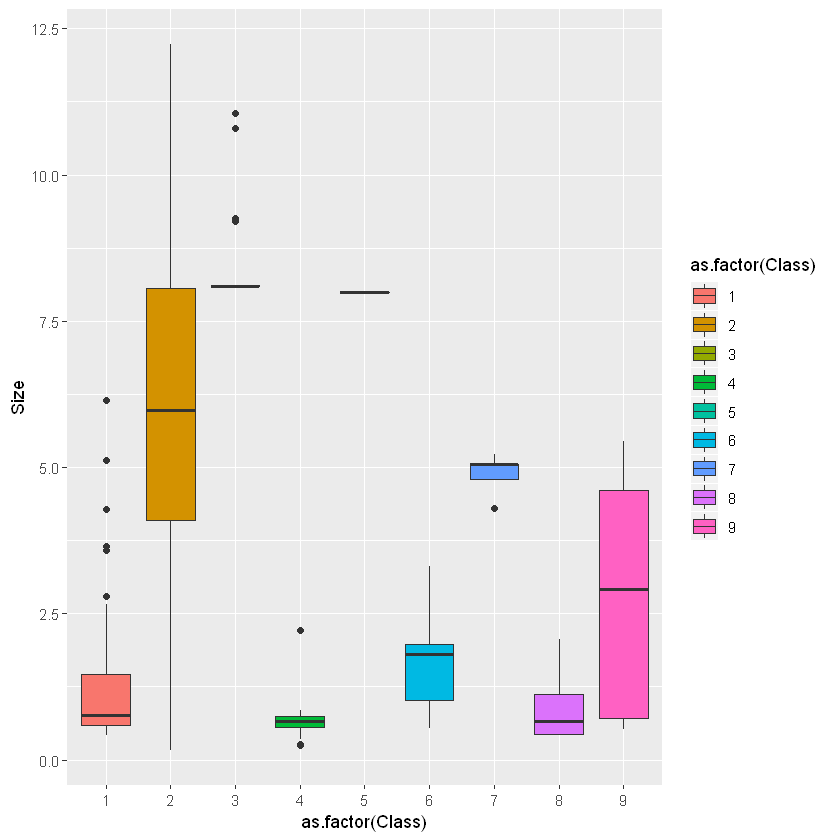

In [13]:

  for(i in byte_files_unlist){
    x<-subset(train_labels,i==as.character(train_labels$Id))
    y<-gsub(" ","", paste(as.character(x$Id),".bytes"))
    z<-file.size(y)/(1024.0*1024.0)
    x<-cbind(x,z)
    byte_df<- rbind(byte_df,x)
    
  }
  colnames(byte_df)[3]<-"Size"
  
  print(head(byte_df))
  
  p <- ggplot(byte_df, aes(as.factor(Class), Size,fill=as.factor(Class)))
  p + geom_boxplot()
  
  

# Feature extraction
3.2.1 File size of byte files as a feature

In [14]:

#  column.names <- readBin(y, character(),  n = 3)
  
  lis2<-list()
  
  lis<-list()
  #byte_files1<-byte_files[1:10]
  for(i in 1:length(byte_files)){
    y1<-readChar(byte_files[i], nchars = 99999999)
    y1<-gsub("\r\n"," ",y1)
    y1<-as.character(y1)
    y1<-strsplit(y1," ")
    y1<-as.vector(y1[[1]])
    # for(j in y1){
    #   if(nchar(j)==2){
    #     lis<-append(lis,j,after = length(lis))
    #     lis<-tolower(unlist(lis))
    # 
    #   }
    #   lis2<-append(lis2,lis,after = length(lis2))
    # }
    lis2[[i]]<-y1

  }
  
  

In [17]:
memory.limit(102400)
  
  lis<-lapply(lis2,function(x) x[!nchar(as.character(x)) > 2 ])

  x<-unique(lis[[1]])
  b_vals<-sort(x,decreasing = FALSE)
  b_vals<- c("ID",b_vals)
  
  # ("ID,00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,
  #   25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,
  #   47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,
  #   6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,
  #   8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,
  #   b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,
  #   d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
  # 
  
 
  bin_freq<-lapply(lis, function(x) as.vector(table(x)))
  
  x<-table(x)
  x<-data.frame(x)
  bin_val<-t(x$x)
  

[1] 102400

In [19]:
l<-list()
  for(i in 1:length(bin_freq)){
    z<-length(bin_freq[[i]])
    l<-append(l,z,length(l))
    
  }
  
  index_del<-which(l==257)
  byte_files<-byte_files[index_del]
  unlist_bytes<-unlist(strsplit(byte_files,".bytes"))
  byte_df<-subset(byte_df,as.character(byte_df$Id) %in% unlist_bytes)
  
  
  bin_freq<-bin_freq[index_del]

  
  df_freq<-data.frame(do.call(rbind, bin_freq))
  
  colnames(df_freq)<-bin_val
  
  df_final<-cbind(byte_df,df_freq)
  print(head(df_final))
  colnames(df_final)[-c(1,2)]
  
 
  
df_final.id.cl<-df_final[c(1,2)]
df_final[c(1,2)]<-NULL

df_normalize<-data.frame(rep(0,nrow(df_final)))



                       Id Class     Size    ??     00    01    02    03    04
1542 01IsoiSMh5gxyDYTl4CB     2 6.556152  8588  39755  8337  7249  7186  8663
9857 01jsnpXSAlgw6aPeDxrU     9 4.602051   468  93506  9542  2568  2438  8925
7483 08BX5Slp2I1FraZWbc6j     6 1.047852   208 185684  4711   565   926  1020
9861 0B2RwKm6dq9fjUWDNIOa     9 4.616211   428 238102 11699  6410  5685 10642
9862 0bjN3Kgw5OATSreRmEdi     9 4.616211   504  94683  9384  2569  2988  9322
1586 0IAlcuEiP9G6epb71Oom     2 8.085449 12796 100050 70081 64833 61725  8292
        05   06   07    08   09   0A     0B   0C   0D   0E    0F    10    11
1542  6844 8420 7589  9291  358  340   6649 8660  447  218  6869  8869   228
9857  9330 9007 2342  9107 2457 2655   2669 9113 2584 2788  2487  2782  2611
7483   397  411  745  1367  443  309    307 1043  257  209  1005  4125   382
9861  7651 7298 4937 11708 3409 2409   2715 7552 5209 3187  6973  5142  2692
9862  9052 8925 2589  9162 2550 2635 123683 9426 2514 2585  2783  259

[1] "Size" "??"   "00"   "01"   "02"   "03"   "04"   "05"   "06"   "07"  
 [11] "08"   "09"   "0A"   "0B"   "0C"   "0D"   "0E"   "0F"   "10"   "11"  
 [21] "12"   "13"   "14"   "15"   "16"   "17"   "18"   "19"   "1A"   "1B"  
 [31] "1C"   "1D"   "1E"   "1F"   "20"   "21"   "22"   "23"   "24"   "25"  
 [41] "26"   "27"   "28"   "29"   "2A"   "2B"   "2C"   "2D"   "2E"   "2F"  
 [51] "30"   "31"   "32"   "33"   "34"   "35"   "36"   "37"   "38"   "39"  
 [61] "3A"   "3B"   "3C"   "3D"   "3E"   "3F"   "40"   "41"   "42"   "43"  
 [71] "44"   "45"   "46"   "47"   "48"   "49"   "4A"   "4B"   "4C"   "4D"  
 [81] "4E"   "4F"   "50"   "51"   "52"   "53"   "54"   "55"   "56"   "57"  
 [91] "58"   "59"   "5A"   "5B"   "5C"   "5D"   "5E"   "5F"   "60"   "61"  
[101] "62"   "63"   "64"   "65"   "66"   "67"   "68"   "69"   "6A"   "6B"  
[111] "6C"   "6D"   "6E"   "6F"   "70"   "71"   "72"   "73"   "74"   "75"  
[121] "76"   "77"   "78"   "79"   "7A"   "7B"   "7C"   "7D"   "7E"   "7F"  
[131] "80"   "81"   "82"   "83"   "84"   "85"   "86"   "87"   "88"   "89"  
[141] "8A"   "8B"   "8C"   "8D"   "8E"   "8F"   "90"   "91"   "92"   "93"  
[151] "94"   "95"   "96"   "97"   "98"   "99"   "9A"   "9B"   "9C"   "9D"  
[161] "9E"   "9F"   "A0"   "A1"   "A2"   "A3"   "A4"   "A5"   "A6"   "A7"  
[171] "A8"   "A9"   "AA"   "AB"   "AC"   "AD"   "AE"   "AF"   "B0"   "B1"  
[181] "B2"   "B3"   "B4"   "B5"   "B6"   "B7"   "B8"   "B9"   "BA"   "BB"  
[191] "BC"   "BD"   "BE"   "BF"   "C0"   "C1"   "C2"   "C3"   "C4"   "C5"  
[201] "C6"   "C7"   "C8"   "C9"   "CA"   "CB"   "CC"   "CD"   "CE"   "CF"  
[211] "D0"   "D1"   "D2"   "D3"   "D4"   "D5"   "D6"   "D7"   "D8"   "D9"  
[221] "DA"   "DB"   "DC"   "DD"   "DE"   "DF"   "E0"   "E1"   "E2"   "E3"  
[231] "E4"   "E5"   "E6"   "E7"   "E8"   "E9"   "EA"   "EB"   "EC"   "ED"  
[241] "EE"   "EF"   "F0"   "F1"   "F2"   "F3"   "F4"   "F5"   "F6"   "F7"  
[251] "F8"   "F9"   "FA"   "FB"   "FC"   "FD"   "FE"   "FF"

In [20]:

normalize<- function(x){
  
  for(i in 1:ncol(x)){
    max_value<- max(x[,i])
    min_value<- min(x[,i])
    df_normalize[,i]<-round((x[,i]-min_value)/(max_value-min_value),6)

  }
  return(df_normalize)
}  


normalize_df<-normalize(df_final)  
normalize_df<-cbind(df_final.id.cl,normalize_df)


print(dim(normalize_df))
colnames(normalize_df)[3:ncol(normalize_df)]<-colnames(df_final)
  # library(caret)
  # # Assuming goal class is column 10
  # 
  # preObj <- preProcess(df_final[,-c(1,2)], method= "scale")
  # newData <- predict(preObj, df_final[, -c(1,2)])
  # head(newData)
  # 



[1] 498 260


# Multivariate Analysis

Warning message:
"package 'Rtsne' was built under R version 3.5.2"

Performing PCA
Read the 498 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.20 seconds (sparsity = 0.267205)!
Learning embedding...
Iteration 50: error is 54.129979 (50 iterations in 0.12 seconds)
Iteration 100: error is 51.572037 (50 iterations in 0.09 seconds)
Iteration 150: error is 51.296411 (50 iterations in 0.09 seconds)
Iteration 200: error is 51.243601 (50 iterations in 0.09 seconds)
Iteration 250: error is 51.220774 (50 iterations in 0.09 seconds)
Iteration 300: error is 0.363168 (50 iterations in 0.08 seconds)
Iteration 350: error is 0.317236 (50 iterations in 0.08 seconds)
Iteration 400: error is 0.302128 (50 iterations in 0.09 seconds)
Iteration 450: error is 0.293723 (50 iterations in 0.09 seconds)
Iteration 500: error is 0.289022 (50 iterations in 0.09 seconds)
Fitting performed in 0.93 seconds.
Performing PCA
Read the 498 x 50 data matri

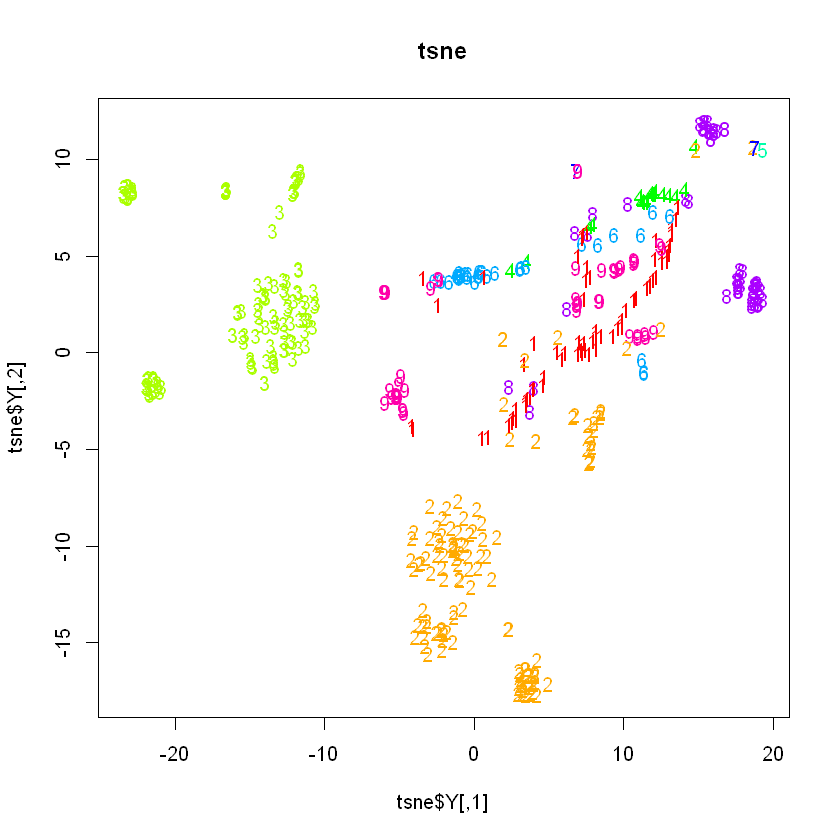

Performing PCA
Read the 498 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.14 seconds (sparsity = 0.267205)!
Learning embedding...
Iteration 50: error is 62.237127 (50 iterations in 0.11 seconds)
Iteration 100: error is 62.035272 (50 iterations in 0.10 seconds)
Iteration 150: error is 61.064289 (50 iterations in 0.12 seconds)
Iteration 200: error is 61.664453 (50 iterations in 0.16 seconds)
Iteration 250: error is 62.331473 (50 iterations in 0.12 seconds)
Iteration 300: error is 2.326255 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.845347 (50 iterations in 0.10 seconds)
Iteration 400: error is 0.415682 (50 iterations in 0.09 seconds)
Iteration 450: error is 0.329297 (50 iterations in 0.09 seconds)
Iteration 500: error is 0.313558 (50 iterations in 0.09 seconds)
Fitting performed in 1.06 seconds.


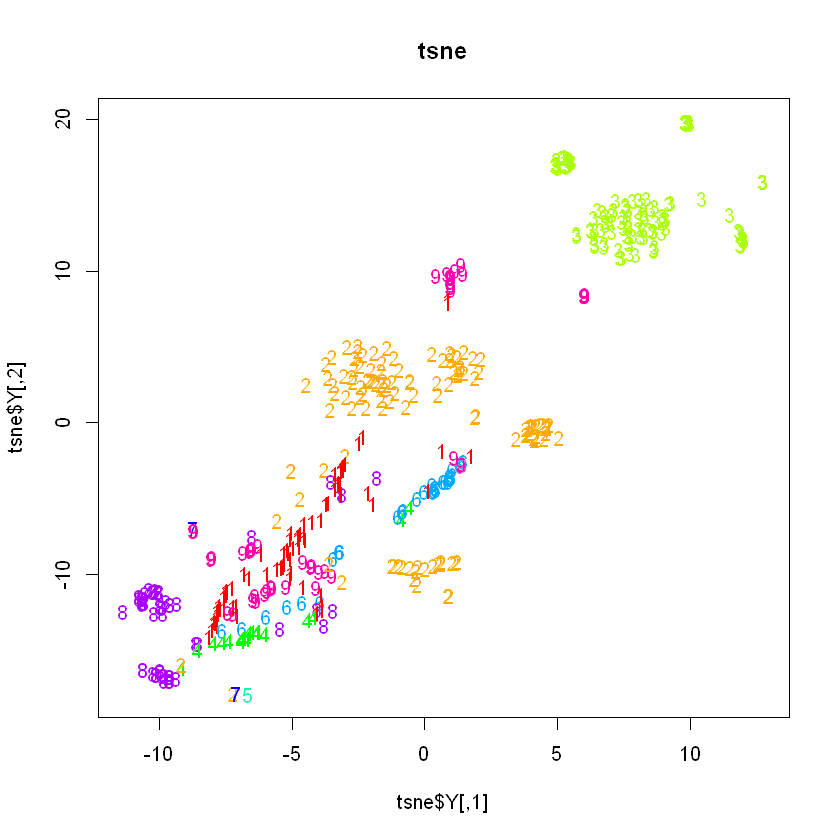

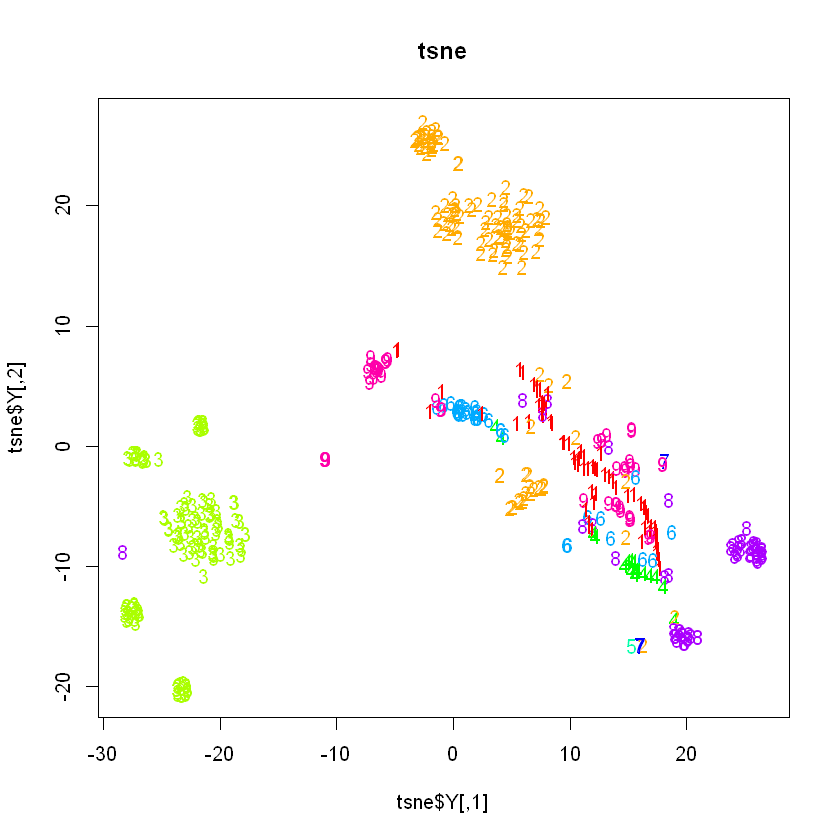

In [22]:


## Executing the algorithm on curated data
 



#df_tsne<-normalize_df %>% distinct()

  library(Rtsne)
  tsne <- Rtsne(normalize_df[,-c(1,2)], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500,eta=200)
  colors <- rainbow(9)
  ## Plotting
  plot(tsne$Y, t='n', main="tsne")
  text(tsne$Y, labels=normalize_df$Class, col=colors[normalize_df$Class])
  
  tsne <- Rtsne(normalize_df[,-c(1,2)], dims = 2, perplexity=50, verbose=TRUE, max_iter = 500,eta=200)
  colors <- rainbow(9)
  ## Plotting
  plot(tsne$Y, t='n', main="tsne")
  text(tsne$Y, labels=normalize_df$Class, col=colors[normalize_df$Class])
  
  
  tsne <- Rtsne(normalize_df[,-c(1,2)], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500,eta=2000)
  colors <- rainbow(9)
  ## Plotting
  plot(tsne$Y, t='n', main="tsne")
  text(tsne$Y, labels=normalize_df$Class, col=colors[normalize_df$Class])
  
  
  
  
  

# Train Test split

In [24]:

  library(caret)
  
  normalize_df<-normalize_df[!normalize_df$Class==5,]
  normalize_df_<-normalize_df[,-1]
  #Spliting training set into two parts based on outcome: 75% and 25%
  index <- createDataPartition(normalize_df_$Class, p=0.60, list=FALSE)
  trainSet <- normalize_df_[ index,]
  testSet <- normalize_df_[-index,]

    
  
  
  
  
  
  
 

Loading required package: lattice


# Distribution of yi in train and test data

[1] "No of Data points in the class 40 ( 13.33%)"
[1] "No of Data points in the class 81 ( 27%)"
[1] "No of Data points in the class 80 ( 26.67%)"
[1] "No of Data points in the class 13 ( 4.33%)"
[1] "No of Data points in the class 19 ( 6.33%)"
[1] "No of Data points in the class 4 ( 1.33%)"
[1] "No of Data points in the class 33 ( 11%)"
[1] "No of Data points in the class 30 ( 10%)"


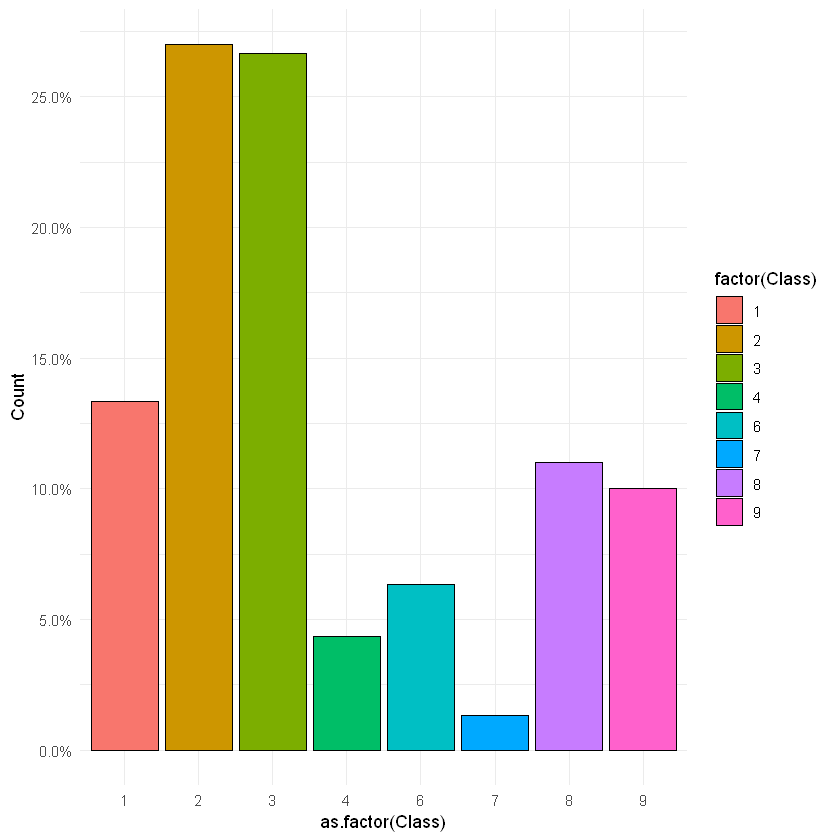

In [26]:
 # Use the mtcars dataset.
  brks<-seq(0,1,0.05)  
  
  # Basic barplot:
  ggplot(trainSet, aes(x=as.factor(Class),fill = factor(Class) )) +  geom_bar(aes(y = (..count..)/sum(..count..)),width = 0.9,colour="black")+
             scale_y_continuous(breaks = brks,labels=scales::percent) +
             ylab("Count")+ theme_minimal()
  
  dtp<-table(trainSet$Class)
  m<- sum(as.vector(dtp))
  for(i in dtp){
    i=paste("No of Data points in the class",i,"(",round(i/m*100,2),"%",")")
    
    i=gsub(" % ","%",i)
    i=gsub(" )",")",i)
    print(i)
  }
  
  
  
  

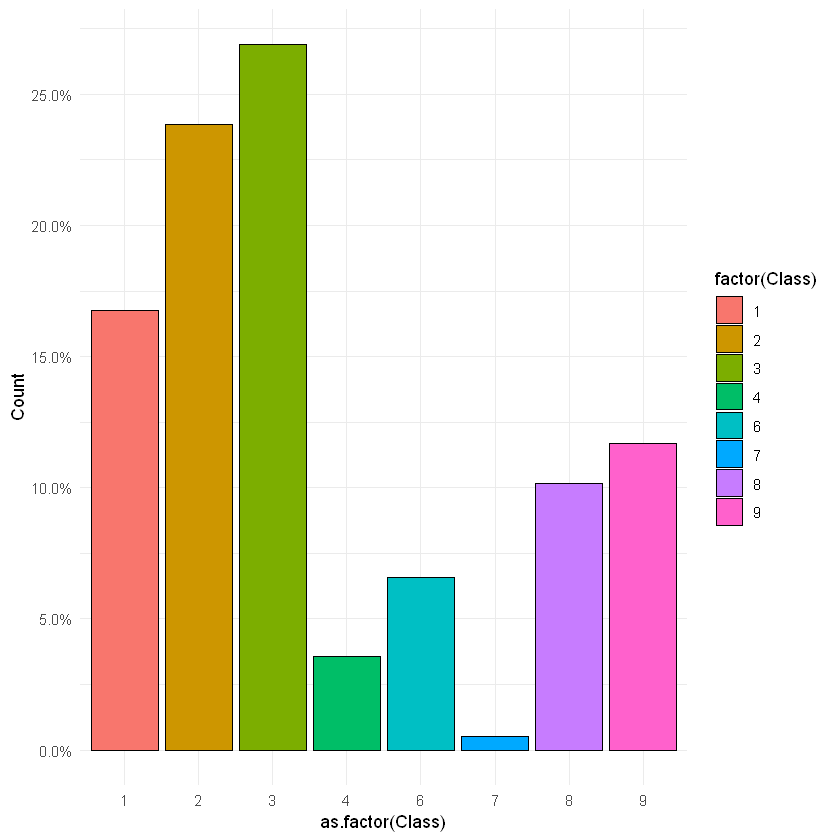

In [27]:

ggplot(testSet, aes(x=as.factor(Class),fill = factor(Class) )) +  geom_bar(aes(y = (..count..)/sum(..count..)),width = 0.9,colour="black")+
             scale_y_continuous(breaks = brks,labels=scales::percent) +
             ylab("Count")+ theme_minimal()
  
  
  

In [28]:

  
  dtp1<-table(testSet$Class)
  m1<- sum(as.vector(dtp1))
  for(i in dtp1){
    i=paste("No of Data points in the class",i,"(",round(i/m1*100,2),"%",")")
    
    i=gsub(" % ","%",i)
    i=gsub(" )",")",i)
    print(i)
  }
  
  
  
  

[1] "No of Data points in the class 33 ( 16.75%)"
[1] "No of Data points in the class 47 ( 23.86%)"
[1] "No of Data points in the class 53 ( 26.9%)"
[1] "No of Data points in the class 7 ( 3.55%)"
[1] "No of Data points in the class 13 ( 6.6%)"
[1] "No of Data points in the class 1 ( 0.51%)"
[1] "No of Data points in the class 20 ( 10.15%)"
[1] "No of Data points in the class 23 ( 11.68%)"


# Machine Leaning Models on bytes files
 K Nearest Neighbour Classification


In [29]:

  # Define train control for k fold cross validation
  train_control <- trainControl(method="repeatedcv", number=10, classProbs=TRUE, 
                                savePredictions=TRUE,repeats = 5,
                                summaryFunction = multiClassSummary)
  metric <- "logLoss"
  trainSet$Class <- make.names(factor(trainSet$Class))
  # Fit Naive Bayes Model
  model <- train(Class~., data=trainSet, method="knn",metric="logLoss", trControl=train_control)
  # Summarise Results
  print(model)
  
  
  

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

k-Nearest Neighbors 

300 samples
258 predictors
  8 classes: 'X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 270, 271, 269, 270, 270, 271, ... 
Resampling results across tuning parameters:

  k  logLoss   AUC        prAUC      Accuracy   Kappa      Mean_F1
  5  2.777440  0.9351539  0.1671020  0.8511634  0.8164867  NaN    
  7  2.614653  0.9360645  0.2160879  0.8487056  0.8137653  NaN    
  9  2.429365  0.9384321  0.2378109  0.8433938  0.8073936  NaN    
  Mean_Sensitivity  Mean_Specificity  Mean_Pos_Pred_Value  Mean_Neg_Pred_Value
  0.6938368         0.9789564         NaN                  0.9763257          
  0.6830729         0.9786039         NaN                  0.9743549          
  0.6857639         0.9777961         NaN                  0.9733555          
  Mean_Precision  Mean_Recall  Mean_Detection_Rate  Mean_Balanced_Accuracy
  NaN             0.6938368    0.1063954         

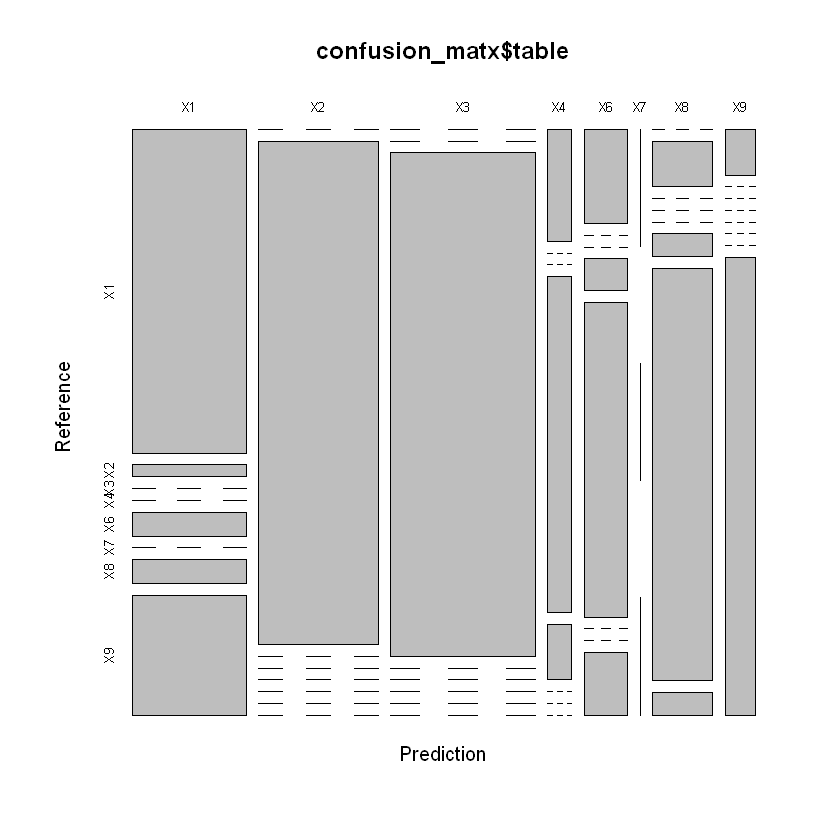

In [30]:

  # Set seed
  set.seed(123)
  testSet$Class <- make.names(factor(testSet$Class))
  # Confusion matrix for logistic regression model
 confusion_matx<- confusionMatrix(predict(model, testSet),
                  as.factor(testSet$Class))
  

 plot(confusion_matx$table)
 

 

# XgBoost Classification

In [32]:

 grid <- expand.grid(n.trees=50,
                     shrinkage=c(0.01,0.05,0.1),
                     n.minobsinnode = 3,
                     interaction.depth=5)
 
 # training the model
 predictors<- colnames(trainSet)[!colnames(trainSet) %in% "Class"]
 outcomeName<-colnames(trainSet)[colnames(trainSet) %in% "Class"]
 model_gbm<-train(trainSet[,predictors],trainSet[,outcomeName],method='gbm',trControl=train_control,tuneGrid=grid)
 
 # summarizing the model
 print(model_gbm)
 
 
 
 
 

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.0794             nan     0.0100    0.1065
     2        2.0142             nan     0.0100    0.1092
     3        1.9512             nan     0.0100    0.0926
     4        1.8954             nan     0.0100    0.0951
     5        1.8390             nan     0.0100    0.0827
     6        1.7891             nan     0.0100    0.0869
     7        1.7380             nan     0.0100    0.0706
     8        1.6928             nan     0.0100    0.0761
     9        1.6477             nan     0.0100    0.0747
    10        1.6037             nan     0.0100    0.0669
    20        1.2626             nan     0.0100    0.0437
    40        0.8455             nan     0.0100    0.0230
    50        0.7053             nan     0.0100    0.0202

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.0794             nan     0.0500    0.5287
     2        1.7530             nan     0.0500    0.3837
     3       

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        2.0794             nan     0.1000    0.9035
     2        1.4576             nan     0.1000    0.4555
     3        1.1433             nan     0.1000    0.3186
     4        0.9213             nan     0.1000    0.2233
     5        0.7623             nan     0.1000    0.1799
     6        0.6371             nan     0.1000    0.1238
     7        0.5427             nan     0.1000    0.0972
     8        0.4642             nan     0.1000    0.0813
     9        0.3965             nan     0.1000    0.0652
    10        0.3387             nan     0.1000    0.0638
    20        0.0918             nan     0.1000    0.0058
    40        0.0139             nan     0.1000   -0.0005
    50        0.0061             nan     0.1000   -0.0001

Stochastic Gradient Boosting 

300 samples
258 predictors
  8 classes: 'X1', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 